In [1]:
%matplotlib inline
import tonbo
from tonbo.data import RotatePrepocessDataset
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
def tensor2img(ax, data):
    x = data.data.numpy()[0, 0, :, :]
    ax.imshow(x)

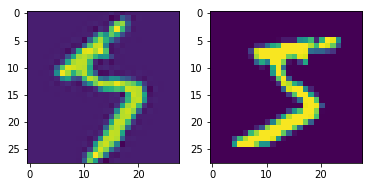

In [18]:
train_dataset = datasets.MNIST("~/.mnist", train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ]))
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

polor_dataset =  RotatePrepocessDataset(train_dataset, rotate=True, rotation_angle=30, bg_value=-0.4242)
normal_dataset =  RotatePrepocessDataset(train_dataset, polor_cordinate=False)

polor_iterator = torch.utils.data.DataLoader(
    polor_dataset, batch_size=1, shuffle=False)
normal_iterator = torch.utils.data.DataLoader(
    normal_dataset, batch_size=1, shuffle=False)

for (pdata, py), (data, y) in zip(polor_iterator, normal_iterator):
    tensor2img(ax, pdata)
    tensor2img(ax2, data)
    plt.show()
    break

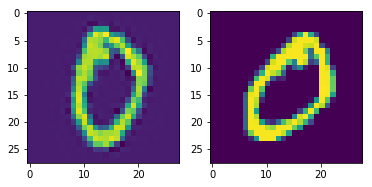

In [27]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, ((pdata, py), (data, y)) in enumerate(zip(polor_iterator, normal_iterator)):
    tensor2img(ax, pdata)
    tensor2img(ax2, data)
    if i == 1:
        plt.show()
        break